# Chapter 03

## 1. Neural Network (신경망)
<img src="./images/neuralnet.png" alt="Neural" style="height: 300px;"/>

- 기존 Perceptron은 가중치 설정을 수작업으로 해주어야 한다.
- Neural Network는 학습을 통해 적절한 가중치로 스스로 업데이트
- 인간의 개입을 최소화 한다.
- 발전된 Multi-layer Perceptron
- 입력층, 은닉층, 출력층 으로 구성된다.
- 은닉층에는 다수의 층이 포함될 수 있다.

### 1) Perceptron 변형
- ***f(x) <= b***
- ***f(x) -b <= 0***
- w0 = -b
<img src="./images/convertedpt.png" alt="Neural" style="height: 300px;"/>
### 2) 변형된 식
<img src="./images/function1.png" alt="Neural" style="height: 50px;"/>
### 3) 간결한 형태
<img src="./images/function2.png" alt="Neural" style="height: 30px;"/>
<img src="./images/function3.png" alt="Neural" style="height: 50px;"/>

***h(x)는 활성화 함수(Activation Function)***

## 2. Activation Function
- 뉴런에 입력된 값을 변환한다.
- 뉴런의 출력을 조절한다.
- 출력을 통해 데이터에 의미를 부여한다.
<img src="./images/ActivationFunction.png" alt="Neural" style="height: 300px;"/>
### 1) Step function
<br>
    - 임계값을 경계로 출력이 바뀌는 함수



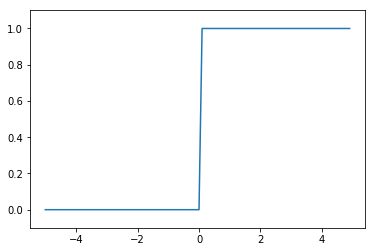

In [6]:
import numpy as np
import matplotlib.pylab as plt

# 1. Convert [x1,x2,x3,x4,....] to [bool,bool,bool,...]
# 2. Convert [bool,bool,...] to [1,0,0,1,....]
def step_function(x):
    y = x > 0 
    return y.astype(np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 2) Sigmoid function
   - 리턴된 배열의 모든 값들이 0과 1사이의 값이 된다.

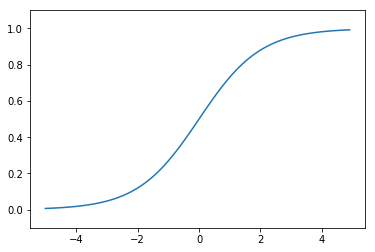

In [7]:
# 1. Convert [x1,x2,x3,x4,...] to [0.x,0.x,0.x,...]
# 2. All results are between 0 and 1
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3) ReLU
- 최근 가장 많이 사용된다.
- input >= 0 => return input
- input < 0 0 => return 0

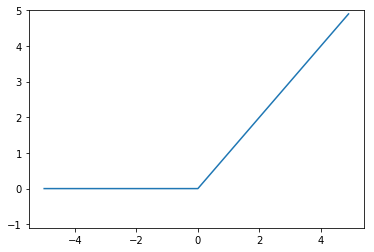

In [8]:
def relu(x):
    return np.maximum(0,x)

np.arange(-0.5, 0.5, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.1,5.0)
plt.show()

### 4) Identify function
- 출력층에서 사용된다.
- 항등함수

In [9]:
def identify_function(x):
    return x

### 5) Softmax
- 출력층에서 사용된다.
- 분류 문제에 많이 사용된다.
- 리턴 배열의 모든 원소의 합이 1이다 => 확률로 해석이 가능
- 각 원소들간의 대소 관계는 변하지 않는다.

In [11]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x-c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    
    return y

# e의 지수승의 오버플로우를 대비한 softmax
# def softmax(x):
#     if x.ndim == 2:
#         x = x.T
#         x = x - np.max(x, axis=0) # axis 0 은 모든 값들을 1차원으로 펼친 후 비교, 1은 행 별로 가장 큰 값 비교.
#         y = np.exp(x) / np.sum(np.exp(x), axis=0)
#         return y.T 

#     x = x - np.max(x) # 오버플로 대책
#     return np.exp(x) / np.sum(np.exp(x))